Import libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline

Data
1. [hw6_dataset.csv](https://drive.google.com/file/d/181asSju1ILeAEqNCLh1qgYi-CP6RFo7M/view?usp=sharing)
2. [hw6_dataset_missing.csv](https://drive.google.com/file/d/14JVTe06qCzouWSxatUFdJtOxvlfrFk7e/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Automated Breast Cancer Detection

In this homework, we will consider the problem of early breast cancer detection from X-ray images. Specifically, given a candidate region of interest (ROI) from an X-ray image of a patient's breast, the goal is to predict if the region corresponds to a malignant tumor (label 1) or is normal (label 0). The training and test data sets for this problem is provided in the file `hw6_dataset.csv`. Each row in these files corresponds to a ROI in a patient's X-ray, with columns 1-117 containing features computed using standard image processing algorithms. The last column contains the class label, and is based on a radiologist's opinion or a biopsy. This data was obtained from the KDD Cup 2008 challenge.

The data set contain a total of 69,098 candidate ROIs, of which only 409 are malignant, while the remaining are all normal. 

*Note*: be careful of reading/treating column names and row names in this data set.

## Question 1: Beyond Classification Accuracy


0.  Split the data set into a training set and a testing set.  The training set should be 75% of the original data set, and the testing set 25%.  Use `np.random.seed(9001)`.

1. Fit a logistic regression classifier to the training set and report the  accuracy of the classifier on the test set. You should use $L_2$ regularization in logistic regression, with the regularization parameter tuned using cross-validation. 
    1. How does the fitted model compare with a classifier that predicts 'normal' (label 0) on all patients? 
    2. Do you think the difference in the classification accuracies are large enough to declare logistic regression as a better classifier than the all 0's classifier? Why or why not?
    
For applications with imbalanced class labels, in this case when there are many more healthy subjects ($Y=0$) than those with cancer ($Y=1$), the classification accuracy may not be the best metric to evaluate a classifier's performance. As an alternative, we could analyze the confusion table for the classifier. 

<ol start="3">
<li> Compute the confusion table for both the fitted classifier and the classifier that predicts all 0's.</li>
<li> Using the entries of the confusion table compute the *true positive rate* and the *true negative rate* for the two classifiers. Explain what these evaluation metrics mean for the specific task of cancer detection. Based on the observed metrics, comment on whether the fitted model is better than the all 0's classifier.</li>
<li> What is the *false positive rate* of the fitted classifier, and how is it related to its true positive and true negative rate? Why is a classifier with high false positive rate undesirable for a cancer detection task?</li>
</ol>
*Hint:* You may use the `metrics.confusion_matrix` function to compute the confusion matrix for a classification model.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import random 
random.seed(9001)
df= pd.read_csv('/content/drive/MyDrive/###Submissions/Intro to Data Science/module_15 & 16/hw6_dataset.csv')
print(df.shape)
y = df[df.columns[-1]]
X = df.iloc[:,:-1]
print(X.shape)
print(y.shape)


(69097, 118)
(69097, 117)
(69097,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9001)

clf = LogisticRegressionCV(random_state=9001,max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_zeros = np.zeros(y_pred.shape)
print("Accuracy for fitted classifier",accuracy_score(y_test, y_pred))
print("Accuracy for all zeros classifier",accuracy_score(y_test, y_zeros))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy for fitted classifier 0.9955707582335658
Accuracy for all zeros classifier 0.9946059728983029


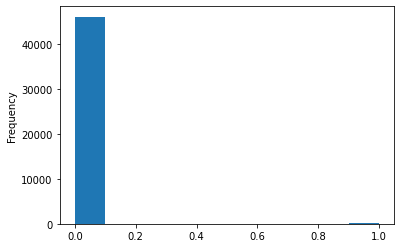

In [ ]:
y_train.plot.hist()

###Q1.
The fitted model is better than all zeroes classifier because from its confusion matrix we can tell it can predict persons with cancer upto some extent rather than labeling everyone as non-cancer patient


###Q2.
Looking at only accuracy we can't tell that logistic regression is better than all zeroes classifier . but looking at confusion matrix proves this wrong.. hence in this condition where there is severe imbalance for judging which is better



if we look at 
```
Accuracy for fitted classifier 0.9955707582335658
Accuracy for all zeros classifier 0.9946059728983029
```
Accuracy for fitted classifier is only a little better than the all zeros classifier.

Therefore we look at the confustion matrix to see the score results.


###Q3.
Below is the confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix


print("Confusion Matrix for fitted classifier")
print(confusion_matrix(y_test, y_pred))


print("Confusion Matrix for all 0's classifier")
print(confusion_matrix(y_test, y_zeros))

Confusion Matrix for fitted classifier
[[22670    10]
 [   91    32]]
Confusion Matrix for all 0's classifier
[[22680     0]
 [  123     0]]


In [ ]:
tp = confusion_matrix(y_test, y_pred)[0][0]
fp = confusion_matrix(y_test, y_pred)[0][1]
tn = confusion_matrix(y_test, y_pred)[1][1]
fn = confusion_matrix(y_test, y_pred)[1][0]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
print("True Positive rate for fitted : ",tpr)
print("True Negetive rate for fitted : ",tnr)
print("False Positive rate for fitted : ",fpr)

tp = confusion_matrix(y_test, y_zeros)[0][0]
fp = confusion_matrix(y_test, y_zeros)[0][1]
tn = confusion_matrix(y_test, y_zeros)[1][1]
fn = confusion_matrix(y_test, y_zeros)[1][0]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
print("True Positive rate for all 0's : ",tpr)
print("True Negetive rate for all 0's : ",tnr)
print("False Positive rate for all 0's : ",fpr)

True Positive rate for fitted :  0.9960019331312332
True Negetive rate for fitted :  0.7619047619047619
False Positive rate for fitted :  0.23809523809523808
True Positive rate for all 0's :  0.9946059728983029
True Negetive rate for all 0's :  nan
False Positive rate for all 0's :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


###Q4.
True positive rate and true negative rate are as above.
true positive and true negative tell us the number of samples in which model performs correctly,false positive and false negative show the cases where it fails.<br>
True positive rate is ratio of true positives to sum of true positive and false negative and is called the **Sensitivity** it tells us the proportion of samples that are positive and are prediceted positive.<br>
True negative rate is the ratio of true negatives to sum of true negative and false positive and is called **Specificity** it tells us the proportion of samples that are negative and are predicetd negative.

As we can observe, the sensitivity of fitted model is better than the sensitivity of all 0's model. hence the fitted model is better.
Although the specificity is high for all zeros model , it is worse than fitted model because it is not labelling in the first place to calculate true negative rate.

###Q5.
False positive rate = 1 - true negative rate  [ $ FPR= 1-TNR $ ]<br>
It indicates it is predicetd that the patient is having cancer but in reality he is not having cancer. Such type of results can create panic in patient.<br>
It is undesirable with high false positive rate because it is not accuarte and indicates that the test failes very rarely but actually the reult is exactly opposite.


## (Optional) Question 2: Missing data

In this problem you are given a different data set, `hw6_dataset_missing.csv`, that is  similar to the one you used above (same column definitions and same conditions), however this data set contains missing values. 

*Note*: be careful of reading/treating column names and row names in this data set as well, it *may* be different than the first data set.


1. Remove all observations that contain and missing values, split the dataset into a 75-25 train-test split, and fit the regularized logistic regression as in Question 1 (use `LogisticRegressionCV` again to retune).  Report the overall classification rate and TPR in the test set.
2. Restart with a fresh copy of the data in `hw6_dataset_missing.csv` and impute the missing data via mean imputation.  Split the data 75-25 and fit the regularized logistic regression model.  Report the overall classification rate and TPR in the test set.  
3. Again restart with a fresh copy of the data in `hw6_dataset_missing.csv` and impute the missing data via a model-based imputation method. Once again split the data 75-25 and fit the regularized logistic regression model.  Report the overall classification rate and TPR in the test set.  
4. Compare the results in the 3 previous parts of this problem.  Prepare a paragraph (5-6 sentences) discussing the results, the computational complexity of the methods, and conjecture and explain why you get the results that you see.



###1.Removing missing values

In [ ]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import random 
random.seed(9001)
df= pd.read_csv('/content/drive/MyDrive/###Submissions/Intro to Data Science/module_15 & 16/HW6_dataset_missing.csv')
print(df.shape)
cols_with_missing = [col for col in df.columns
  if df[col].isnull().any()]

# Drop columns in training and validation data
df = df.drop(cols_with_missing, axis=1)
#reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)



y = df[df.columns[-1]]
X = df.iloc[:,:-1]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9001)

clf = LogisticRegressionCV(random_state=9001,max_iter=200).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_zeros = np.zeros(y_pred.shape)
print("Accuracy for fitted classifier",accuracy_score(y_test, y_pred))
print("Accuracy for all zeros classifier",accuracy_score(y_test, y_zeros))

print("Confusion Matrix for fitted classifier")
print(confusion_matrix(y_test, y_pred))

print("Confusion Matrix for all 0's classifier")
print(confusion_matrix(y_test, y_zeros))

tp = confusion_matrix(y_test, y_pred)[0][0]
fp = confusion_matrix(y_test, y_pred)[0][1]
tn = confusion_matrix(y_test, y_pred)[1][1]
fn = confusion_matrix(y_test, y_pred)[1][0]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
print("True Positive rate for fitted : ",tpr)
print("True Negetive rate for fitted : ",tnr)
print("False Positive rate for fitted : ",fpr)

tp = confusion_matrix(y_test, y_zeros)[0][0]
fp = confusion_matrix(y_test, y_zeros)[0][1]
tn = confusion_matrix(y_test, y_zeros)[1][1]
fn = confusion_matrix(y_test, y_zeros)[1][0]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
print("True Positive rate for all 0's : ",tpr)
print("True Negetive rate for all 0's : ",tnr)
print("False Positive rate for all 0's : ",fpr)


(24999, 119)
(24999, 101)
(24999,)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy for fitted classifier 0.9951515151515151
Accuracy for all zeros classifier 0.9941818181818182
Confusion Matrix for fitted classifier
[[8200    2]
 [  38   10]]
Confusion Matrix for all 0's classifier
[[8202    0]
 [  48    0]]
True Positive rate for fitted :  0.9953872299101724
True Negetive rate for fitted :  0.8333333333333334
False Positive rate for fitted :  0.16666666666666666
True Positive rate for all 0's :  0.9941818181818182
True Negetive rate for all 0's :  nan
False Positive rate for all 0's :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in long_scalars


###2.Using mean imputer to recreate the data in missing values

In [ ]:
from sklearn.impute import SimpleImputer
df= pd.read_csv('/content/drive/MyDrive/###Submissions/Intro to Data Science/module_15 & 16/HW6_dataset_missing.csv')

y = df[df.columns[-1]]
X = df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9001)



# Imputation
my_imputer = SimpleImputer(strategy='mean')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

clf = LogisticRegressionCV(random_state=9001,max_iter=200).fit(imputed_X_train, y_train)
y_pred = clf.predict(imputed_X_test)
y_zeros = np.zeros(y_pred.shape)
print("Accuracy for fitted classifier",accuracy_score(y_test, y_pred))
print("Accuracy for all zeros classifier",accuracy_score(y_test, y_zeros))

print("Confusion Matrix for fitted classifier")
print(confusion_matrix(y_test, y_pred))

print("Confusion Matrix for all 0's classifier")
print(confusion_matrix(y_test, y_zeros))

tp = confusion_matrix(y_test, y_pred)[0][0]
fp = confusion_matrix(y_test, y_pred)[0][1]
tn = confusion_matrix(y_test, y_pred)[1][1]
fn = confusion_matrix(y_test, y_pred)[1][0]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
print("True Positive rate for fitted : ",tpr)
print("True Negetive rate for fitted : ",tnr)
print("False Positive rate for fitted : ",fpr)

tp = confusion_matrix(y_test, y_zeros)[0][0]
fp = confusion_matrix(y_test, y_zeros)[0][1]
tn = confusion_matrix(y_test, y_zeros)[1][1]
fn = confusion_matrix(y_test, y_zeros)[1][0]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
print("True Positive rate for all 0's : ",tpr)
print("True Negetive rate for all 0's : ",tnr)
print("False Positive rate for all 0's : ",fpr)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy for fitted classifier 0.9952727272727273
Accuracy for all zeros classifier 0.9941818181818182
Confusion Matrix for fitted classifier
[[8201    1]
 [  38   10]]
Confusion Matrix for all 0's classifier
[[8202    0]
 [  48    0]]
True Positive rate for fitted :  0.9953877897803132
True Negetive rate for fitted :  0.9090909090909091
False Positive rate for fitted :  0.09090909090909091
True Positive rate for all 0's :  0.9941818181818182
True Negetive rate for all 0's :  nan
False Positive rate for all 0's :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in long_scalars


###3.Using complex imputer to fill data in missing fields.

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


df= pd.read_csv('/content/drive/MyDrive/###Submissions/Intro to Data Science/module_15 & 16/HW6_dataset_missing.csv')

y = df[df.columns[-1]]
X = df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9001)



# Imputation Model
my_imputer = IterativeImputer(max_iter=10, random_state=9001)
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

clf = LogisticRegressionCV(random_state=9001,max_iter=200).fit(imputed_X_train, y_train)
y_pred = clf.predict(imputed_X_test)
y_zeros = np.zeros(y_pred.shape)
print("Accuracy for fitted classifier",accuracy_score(y_test, y_pred))
print("Accuracy for all zeros classifier",accuracy_score(y_test, y_zeros))

print("Confusion Matrix for fitted classifier")
print(confusion_matrix(y_test, y_pred))

print("Confusion Matrix for all 0's classifier")
print(confusion_matrix(y_test, y_zeros))

tp = confusion_matrix(y_test, y_pred)[0][0]
fp = confusion_matrix(y_test, y_pred)[0][1]
tn = confusion_matrix(y_test, y_pred)[1][1]
fn = confusion_matrix(y_test, y_pred)[1][0]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
print("True Positive rate for fitted : ",tpr)
print("True Negetive rate for fitted : ",tnr)
print("False Positive rate for fitted : ",fpr)

tp = confusion_matrix(y_test, y_zeros)[0][0]
fp = confusion_matrix(y_test, y_zeros)[0][1]
tn = confusion_matrix(y_test, y_zeros)[1][1]
fn = confusion_matrix(y_test, y_zeros)[1][0]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
print("True Positive rate for all 0's : ",tpr)
print("True Negetive rate for all 0's : ",tnr)
print("False Positive rate for all 0's : ",fpr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy for fitted classifier 0.9952727272727273
Accuracy for all zeros classifier 0.9941818181818182
Confusion Matrix for fitted classifier
[[8200    2]
 [  37   11]]
Confusion Matrix for all 0's classifier
[[8202    0]
 [  48    0]]
True Positive rate for fitted :  0.9955080733276679
True Negetive rate for fitted :  0.8461538461538461
False Positive rate for fitted :  0.15384615384615385
True Positive rate for all 0's :  0.9941818181818182
True Negetive rate for all 0's :  nan
False Positive rate for all 0's :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in long_scalars
